# K- Nearest Neighbor Regressor

In [1]:
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
import seaborn as sns

## Generating the database

In [4]:
inputs, target = make_regression(n_samples = 10,
                                 n_features = 1,
                                 noise = 15,
                                 random_state = 365)

In [6]:
target = target/40 #reducing the size of target

## Plotting the database

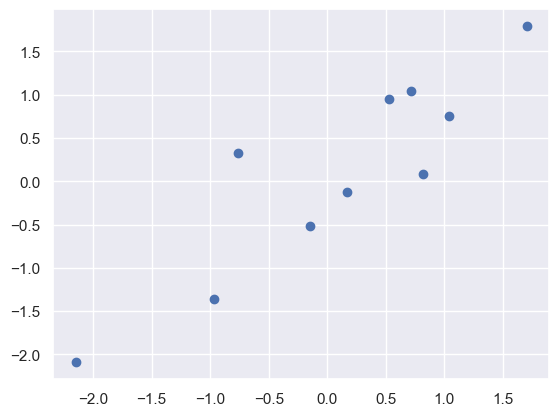

In [7]:
sns.set()
plt.scatter(inputs, target)

## Creating the model

In [13]:
from sklearn.neighbors import KNeighborsRegressor

reg_knn = KNeighborsRegressor(n_neighbors = 2)
reg_knn.fit(inputs, target)

KNeighborsRegressor(n_neighbors=2)

## Predicting a sample

In [14]:
# what would be the predicted value of y if x is equal to -0.5

x_pred = -0.5
y_pred = reg_knn.predict([[x_pred]])
y_pred

array([-0.09226329])

In [15]:
neighbors = reg_knn.kneighbors([[x_pred]])
neighbors

(array([[0.26014535, 0.35632097]]), array([[8, 3]], dtype=int64))

The first array keeps the distance along the x-axis from the point we're predicting to its nearest neighbor. The second array stores the index of the nearest neighbor.

## Visualizing the neighbors

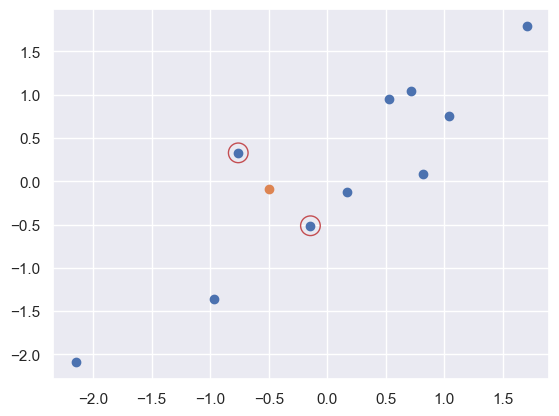

In [16]:
sns.set()

plt.scatter(inputs, target)
plt.scatter(x_pred, y_pred)

plot_x_train = []
plot_y_train = []

for i  in neighbors[1]: #loop through all nearest neighbors
    plot_x_train.append(inputs[i]) #retrieve coordinates of all nearest neighbors
    plot_y_train.append(target[i])

plt.scatter(plot_x_train, #plot a circle at the respective places
           plot_y_train,
           s=200, facecolors='none', edgecolors='r');

We see that our point is positioned very closed to its nearest neighbor, but how is its y value determined?

## Calculating the predicted value

In [18]:
# display the y coordinate of the nearest neighbor together with the predicted y coordinate
target[8], target[3], y_pred

(0.3288886919385298, -0.5134152746794666, array([-0.09226329]))

How do we obtain the number -0.096226329? It represents the arithematic means of the first two neighbor' y values

In [19]:
(target[8]+target[3])/2

-0.09226329137046838